In [18]:
## Import libraries
import os
# import random
# import math
from IPython.display import SVG
import numpy as np
# import itertools

## Import custom
from lib import qLearning as ql
from lib import support as fn
from lib import mazeSVG

In [19]:
## Define main directories
config_dir = 'maze_config'
temp_dir = 'temp'
c_dir = '.'
# c_dir = os.getcwd()

## Generate paths
## Path to maze config files
config_path = fn.gen_path(c_dir, config_dir)

## Path to experimental results folder
temp_path = fn.gen_path(c_dir, temp_dir)

File 'maze_config' exist in '.'
File 'temp' exist in '.'


In [20]:
# ## Select maze config file
# mazeConfig_file = fn.select_maze(config_path)

# ## Read maze config file
# maze_config = fn.load_mazeConfig(config_path, mazeConfig_file)

# ## Pass content of maze_config
# maze_x = maze_config[0]
# maze_y = maze_config[1]
# total_state = maze_config[2]
# total_act = maze_config[3]
# ns_list = maze_config[4]
# rt_list = maze_config[5]

# ## Display Maze
# # blank_maze = os.path.join(temp_path, 'blank_maze.svg')
# # blank_maze = os.path.join('temp', 'blank_maze.svg')
# blank_maze = 'temp/temp.svg'
# mSVG = mazeSVG.drawMaze(maze_x, maze_y, ns_list)
# mSVG.gen_svg(blank_maze)
# display(SVG(blank_maze))

In [21]:
def scan_maze(mazeDir):
    """
    Scan all available maze config files
    """
    # Print intial status
    print(f'Scanning Maze Config File...')
    # Get list of maze config available in the folder
    mazeFiles = os.listdir(mazeDir)

    # Sort file
    mazeFiles.sort()
    
    # Filter files to individual and set conviguration lists
    mazeConfigList = []
    setConfigList = []
    for file in mazeFiles:
        extension = os.path.splitext(file)[1]
        if (extension == ".txt"):
            mazeConfigList.append(file)
        else:
            setConfigList.append(file)

    # Print scan results
    print("\t%d maze config file(s) found."% len(mazeConfigList))
    print("\t%d maze config set(s) found."% len(setConfigList))
    print('Scanning finished.')

    return mazeFiles

In [22]:
mazeConfig_list = scan_maze(config_path)

Scanning Maze Config File...
	8 maze config file(s) found.
	1 maze config set(s) found.
Scanning finished.


In [32]:
def select_maze(mazeDir):
    # Scan maze config files
    mazeConfigs = scan_maze(mazeDir)
    
    # Check if config files exist
    if len(mazeConfig_list)==0:
        print('No available config file.')
        return None
    else:
        # Print all available configs
        print('List of available maze configs:')
        for config in mazeConfigs:
            idx = mazeConfigs.index(config) + 1
#             print("%d) %s"% (idx, config))
            print(f'\t{idx}) {config}')
            
        # Request user to select maze config
        print('Please choose maze configuration file!')
        loop = True
        while(loop):
            idx = int(input('\tInput Select Index (1-%d) : '%(len(mazeConfig_list))))-1
            if ((0 <= idx) and (idx < len(mazeConfig_list))):
                loop = False
                selected_mazeConfig = mazeConfig_list[idx]
                print("\tSelected '%s'"% selected_mazeConfig)
            else:
                print('\tInput out of range. Please try again.')
        return selected_mazeConfig

In [33]:
selectedConfig = select_maze(config_path)

Scanning Maze Config File...
	8 maze config file(s) found.
	1 maze config set(s) found.
Scanning finished.
List of available maze configs:
	1) 22083010X10c4.txt
	2) 22100605X05c0.txt
	3) 22100605X05c1.txt
	4) 22100605X05c2.txt
	5) 22100605X05c3.txt
	6) 22100605X05c4.txt
	7) 22113040X40c0.txt
	8) 22113040X40c1.txt
	9) 230116_set0
Please choose maze configuration file!
	Input Select Index (1-9) : 10
	Input out of range. Please try again.
	Input Select Index (1-9) : 0
	Input out of range. Please try again.
	Input Select Index (1-9) : a


ValueError: invalid literal for int() with base 10: 'a'

In [60]:
def get_config_data(configFile, TAB = ''):
    """
    Read and separate data from config file to a list.
    """
    # Read Maze config file
    with open(configFile, 'r') as f:
        print(f'{TAB}Loading "{configFile}"...')
        lines = f.readlines()
        totalLine = len(lines)
        print(f'{TAB}\tFile consists of {totalLine} lines of data.')
        f.close()
        
    # Load Maze Size
    mazeX = int(lines[0])
    mazeY = int(lines[1])
    totalState = mazeX * mazeY
    print(f'{TAB}\tMaze size loaded. {mazeX}X{mazeY} ({totalState} states)')

    # Load total action
    totalAct = int(lines[2])
    print(f'{TAB}\tNumber of action loaded. There are {totalAct} actions')

    # Load Next State list
    NSList = [[0] * totalAct for i in range(totalState)]
    for i in range(totalState):
        x = lines[3+i].split(';')
        x.remove('\n')
        for j in range(totalAct):
            NSList[i][j] = int(x[j])
    print(f'{TAB}\tNext State list loaded.')

    # Load Current Reward List
    RTList = [[0.0] * totalAct for i in range(totalState)]
    for i in range(totalState):
        x = lines[3+totalState+i].split(';')
        x.remove('\n')
        for j in range(totalAct):
            RTList[i][j] = float(x[j])
    print(f'{TAB}\tCurrent Reward list loaded.')
    print(f'{TAB}Finish loading "{configFile}"')
    
    return mazeX, mazeY, totalState, totalAct, NSList, RTList

In [66]:
def load_mazeConfig(mazeDir, configFile, TAB=''):
    """
    Read and separate data from config file to a list.
    """
    # Check config file, different behavior for maze set.
    print(f'{TAB}Reading Config File...')
    configTarget = os.path.join(mazeDir, configFile)
    if os.path.isdir(configTarget):
        # Config file is maze set
        print(f'{TAB}\tConfig file contain multiple mazes.')
        mazeConfigs = os.listdir(configTarget)
        mazeConfigs.sort()
        print(f'{TAB}\t{len(mazeConfigs)} maze config files found:')
        configDataList = []
        for mazeConfig in mazeConfigs:
#             print(f'{TAB}\t\t{mazeConfig}')
            fileTarget = os.path.join(configTarget, mazeConfig)
            configData = get_config_data(fileTarget, TAB=f'{TAB}\t\t')
            configDataList.append(configData)
        return configDataList
        
    elif os.path.isfile(configTarget):
        # Config file is a single maze configuration.
        print(f'{TAB}\tConfig file contain 1 maze.')
        print(f'{TAB}\tLoading maze config...')
        configData = get_config_data(configTarget, TAB=f'{TAB}\t\t')
        return [configData]
    else:
        # Config file is neither.
        print(f'{TAB}\tError: Not a config file or set.')

Scanning Maze Config File...
	8 maze config file(s) found.
	1 maze config set(s) found.
Scanning finished.
List of available maze configs:
	1) 22083010X10c4.txt
	2) 22100605X05c0.txt
	3) 22100605X05c1.txt
	4) 22100605X05c2.txt
	5) 22100605X05c3.txt
	6) 22100605X05c4.txt
	7) 22113040X40c0.txt
	8) 22113040X40c1.txt
	9) 230116_set0
Please choose maze configuration file!
	Input Select Index (1-9) : 3
	Selected '22100605X05c1.txt'
Reading Config File...
	Config file contain 1 maze.
	Loading maze config...
		Loading ./maze_config/22100605X05c1.txt...
			File consists of 53 lines of data.
			Maze size loaded. 5X5 (25 states)
			Number of action loaded. There are 4 actions
			Next State list loaded.
			Current Reward list loaded.
		Finish loading ./maze_config/22100605X05c1.txt

1


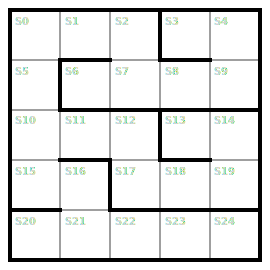

In [73]:
selectedConfig = select_maze(config_path)
configData = load_mazeConfig(config_path, selectedConfig)

print()
print(len(configData))
for item in configData:
#     print(item.shape())
    ## Pass content of maze_config
    maze_x = item[0]
    maze_y = item[1]
    total_state = item[2]
    total_act = item[3]
    ns_list = item[4]
    rt_list = item[5]

    ## Display Maze
    # blank_maze = os.path.join(temp_path, 'blank_maze.svg')
    # blank_maze = os.path.join('temp', 'blank_maze.svg')
    blank_maze = 'temp/temp.svg'
    mSVG = mazeSVG.drawMaze(maze_x, maze_y, ns_list)
    mSVG.gen_svg(blank_maze)
    display(SVG(blank_maze))